

# Project: Investigate a Dataset (No-show Appointments Data Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Finding the number of rows and columns

In [3]:
df.shape

(110527, 14)

### Viewing numerical ststistic

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Viewing datatype information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Data Cleaning

#### Checking for null values

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### Check for duplicates 

In [7]:
sum(df.duplicated())

0

#### Dropping the unwanted columns.

In [8]:
df.drop(['PatientId', 'AppointmentID'], axis = 1 , inplace = True) 

#### Renaming colunms lable to avoid confusion

In [9]:
df.rename(columns= lambda x: x.strip().lower().replace("-", "_"),inplace = True)


#### Using bin edges that will be used to "cut" the data into groups

In [10]:
bin_edges = [-1.000000	, 18.000000, 37.000000	, 55.000000	, 115.000000]

In [11]:
bin_labels = ['chlildren','young', 'adult', 'senior']

In [12]:
df['age_level'] = pd.cut(df['age'], bin_edges, labels = bin_labels)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_level
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,senior
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,senior
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,senior
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,chlildren
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,senior


#### Checking for Missing Value

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no_show           110527 non-null object
age_level         110526 non-null category
dtypes: category(1), int64(7), object(5)
memory usage: 10.2+ MB


In [14]:
df.dropna(inplace = True) # To drop the missing value

<a id='eda'></a>
## Exploratory Data Analysis




#### Histograms for Various Features to Explore Dataset

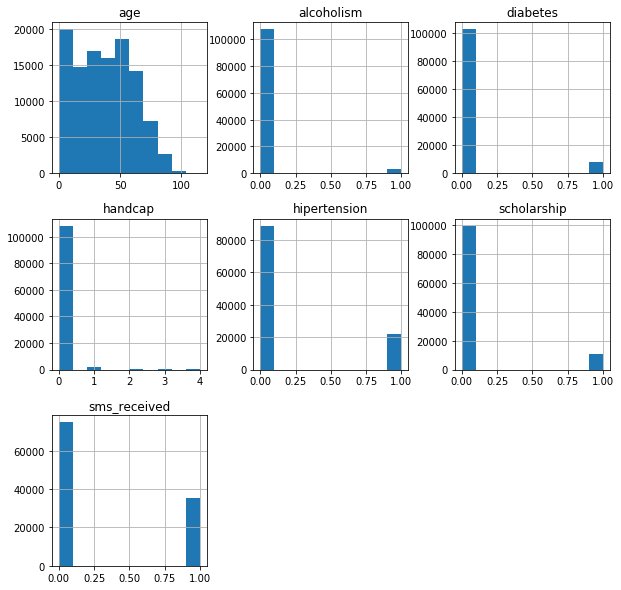

In [15]:
df.hist(figsize=(10, 10));

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [16]:
df.age_level.value_counts() # to count each age levels.

chlildren    28866
senior       27504
young        27250
adult        26906
Name: age_level, dtype: int64

In [17]:
df.gender.value_counts() # to see who has the majiority

F    71839
M    38687
Name: gender, dtype: int64

In [18]:
df.groupby('age_level')['no_show'].value_counts() # to compare between age levels and their attendence

age_level  no_show
chlildren  No         22519
           Yes         6347
young      No         20836
           Yes         6414
adult      No         21651
           Yes         5255
senior     No         23201
           Yes         4303
Name: no_show, dtype: int64

In [19]:
df.groupby('gender')['no_show'].value_counts() # to compare between gender and their attendence

gender  no_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: no_show, dtype: int64

<a id='conclusions'></a>
## Conclusions

### Age levels related to patients attendendence


#### I can conclude that all age levels tened to not showing up to their appointment mostly, in the other hand we can see that children and young patients are more likely to show up than adult and senior patients.

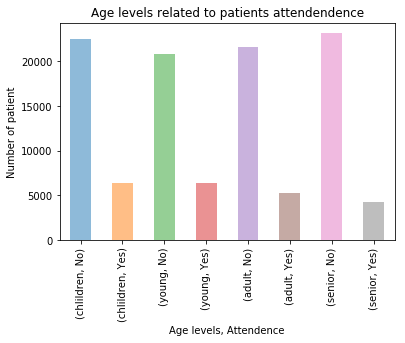

In [20]:
df.groupby('age_level')['no_show'].value_counts().plot(kind = "bar", alpha = 0.5)

plt.title('Age levels related to patients attendendence')
plt.xlabel('Age levels, Attendence')
plt.ylabel('Number of patient');

### Gender related to patients attendence 

#### As illustrated below there is a correletion between gender and not showing up, female patients are more likely in both cases showing up and not showing up than male patients.

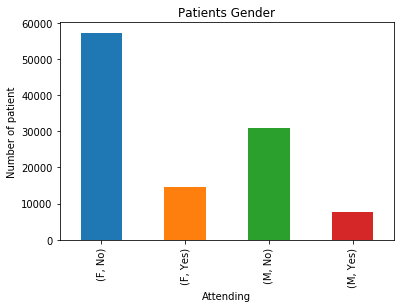

In [21]:
df.groupby('gender')['no_show'].value_counts().plot(kind = 'bar')

plt.title('Patients Gender')
plt.xlabel('Attending')
plt.ylabel('Number of patient');

### Notifying Patients  Prior Appointment Day


#### Informing patients  prior appointment day  shows that it will be the same, majority of patents will still not show up.

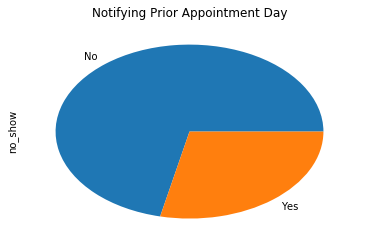

In [22]:
df.query('scheduledday < appointmentday').no_show.value_counts().plot(kind = 'pie')
plt.title('Notifying Prior Appointment Day');

### Patients Age Related to Their Attendence


#### Here we can see that the older the patents, the more he\she tend not to attend to their appointment.

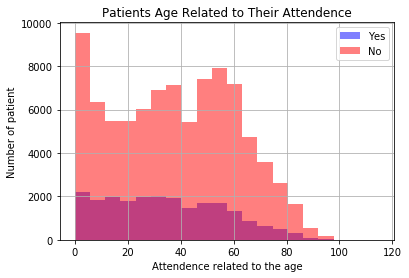

In [23]:
df.query('no_show == "Yes"')['age'].hist(alpha =0.5, bins= 20, color = 'blue', label = 'Yes')
df.query('no_show == "No"')['age'].hist(alpha =0.5, bins = 20, color = 'red', label = 'No')
plt.legend()
plt.title('Patients Age Related to Their Attendence')
plt.xlabel('Attendence related to the age')
plt.ylabel('Number of patient');

### Patients Show Up Related to Receiving SMS


#### Patients receiving SMS are also more likely not to attend.

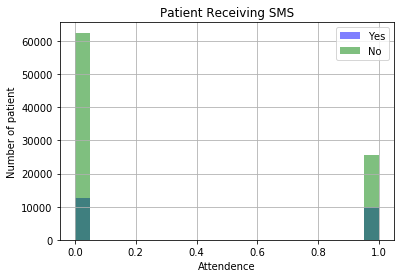

In [24]:
df.query('no_show == "Yes"')['sms_received'].hist(alpha =0.5, bins= 20, color = 'blue', label = 'Yes')
df.query('no_show == "No"')['sms_received'].hist(alpha =0.5, bins = 20, color = 'green', label = 'No')

plt.legend()
plt.title('Patient Receiving SMS')
plt.xlabel('Attendence') # 1 means one or more sms received, 0 means sms not received.
plt.ylabel('Number of patient');

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0